In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

In [4]:
#Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metrics"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_data = []

for city in cities:
    
    try :
        response = requests.get(query_url + city).json()
        print(response)
        city_data.append({
            "city": response["name"], 
            "lat": response["coord"]["lat"],
            "lng": response["coord"]["lon"],
            "max temp": response["main"]["temp_max"],
            "humidity": response["main"]["humidity"],
            "cloudiness":response["clouds"]["all"],
            "wind speed": response["wind"]["speed"],
            "country": response["sys"]["country"],
            "Date": response["dt"]
            
        }
        
        )
        
    except: 
        print("City not found")
        
        pass
    
#Include a print log of each city as it's being processed (with the city number and city name)


{'coord': {'lon': 87.6005, 'lat': 43.801}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 265.68, 'feels_like': 265.68, 'temp_min': 265.68, 'temp_max': 265.68, 'pressure': 1029, 'humidity': 79}, 'visibility': 2000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1638641613, 'sys': {'type': 1, 'id': 9677, 'country': 'CN', 'sunrise': 1638667673, 'sunset': 1638700367}, 'timezone': 28800, 'id': 1529102, 'name': 'Ürümqi', 'cod': 200}
{'coord': {'lon': 118.3755, 'lat': 31.3366}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 273.1, 'feels_like': 269.94, 'temp_min': 273.1, 'temp_max': 273.1, 'pressure': 1027, 'humidity': 57, 'sea_level': 1027, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 2.63, 'deg': 93, 'gust': 3.24}, 'clouds': {'all': 7}, 'dt': 1638641803, 'sys': {'type': 1, 'id': 9660, 'country': 'CN', 'sunrise': 1638

{'coord': {'lon': 111.6167, 'lat': -2.6833}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.02, 'feels_like': 296.9, 'temp_min': 296.02, 'temp_max': 296.02, 'pressure': 1010, 'humidity': 97, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.03, 'deg': 293, 'gust': 10.21}, 'rain': {'1h': 1.1}, 'clouds': {'all': 100}, 'dt': 1638641805, 'sys': {'country': 'ID', 'sunrise': 1638656174, 'sunset': 1638700335}, 'timezone': 25200, 'id': 1632694, 'name': 'Pangkalanbuun', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': 108.1, 'lat': 10.9333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.37, 'feels_like': 293.51, 'temp_min': 293.37, 'temp_max': 293.37, 'pressure': 1012, 'humidity': 79, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'spee

{'coord': {'lon': -169.9187, 'lat': -19.0595}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.09, 'feels_like': 300.06, 'temp_min': 299.09, 'temp_max': 299.09, 'pressure': 1010, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 270}, 'clouds': {'all': 100}, 'dt': 1638641810, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 1638635630, 'sunset': 1638683206}, 'timezone': -39600, 'id': 4036284, 'name': 'Alofi', 'cod': 200}
{'coord': {'lon': 147.3294, 'lat': -42.8794}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.23, 'feels_like': 274.52, 'temp_min': 275.43, 'temp_max': 279.29, 'pressure': 1020, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 310}, 'clouds': {'all': 70}, 'dt': 1638641810, 'sys': {'type': 2, 'id': 2002195, 'country': 'AU', 'sunrise': 1638642378, 'sunset'

{'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 243.55, 'feels_like': 236.55, 'temp_min': 243.55, 'temp_max': 243.55, 'pressure': 999, 'humidity': 98, 'sea_level': 999, 'grnd_level': 995}, 'visibility': 476, 'wind': {'speed': 3.67, 'deg': 314, 'gust': 5.54}, 'clouds': {'all': 100}, 'dt': 1638641812, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
{'coord': {'lon': 135.4833, 'lat': -3.3667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.37, 'feels_like': 298.35, 'temp_min': 297.37, 'temp_max': 297.37, 'pressure': 1007, 'humidity': 96, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 9783, 'wind': {'speed': 1.86, 'deg': 219, 'gust': 2.52}, 'clouds': {'all': 100}, 'dt': 1638641812, 'sys': {'country': 'ID',

{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 244.47, 'feels_like': 237.47, 'temp_min': 244.47, 'temp_max': 244.47, 'pressure': 1009, 'humidity': 99, 'sea_level': 1009, 'grnd_level': 1002}, 'visibility': 5091, 'wind': {'speed': 2.57, 'deg': 239, 'gust': 3.73}, 'clouds': {'all': 100}, 'dt': 1638641813, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}
{'coord': {'lon': 134.2556, 'lat': 7.0419}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.43, 'feels_like': 299.02, 'temp_min': 298.43, 'temp_max': 298.43, 'pressure': 1005, 'humidity': 77, 'sea_level': 1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 277, 'gust': 1.79}, 'rain': {'1h': 0.26}, 'clouds': {'all': 100}, 'dt': 1638641813, 'sys'

{'coord': {'lon': 27.8492, 'lat': 71.0357}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 265.69, 'feels_like': 258.69, 'temp_min': 265.69, 'temp_max': 265.69, 'pressure': 1019, 'humidity': 73, 'sea_level': 1019, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 9.1, 'deg': 211, 'gust': 13.66}, 'clouds': {'all': 11}, 'dt': 1638641815, 'sys': {'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 778707, 'name': 'Mehamn', 'cod': 200}
{'coord': {'lon': -50.0119, 'lat': -24.7911}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.59, 'feels_like': 300.18, 'temp_min': 300.59, 'temp_max': 300.59, 'pressure': 1013, 'humidity': 37, 'sea_level': 1013, 'grnd_level': 905}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 194, 'gust': 2.24}, 'clouds': {'all': 4}, 'dt': 1638641815, 'sys': {'country': 'BR', 'sunrise':

{'coord': {'lon': -149.15, 'lat': -17.7333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 302.16, 'feels_like': 306.67, 'temp_min': 299.82, 'temp_max': 302.16, 'pressure': 1015, 'humidity': 74, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 6.28, 'deg': 66, 'gust': 6.66}, 'rain': {'1h': 0.25}, 'clouds': {'all': 88}, 'dt': 1638641816, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1638630793, 'sunset': 1638678070}, 'timezone': -36000, 'id': 4033557, 'name': 'Tautira', 'cod': 200}
{'coord': {'lon': -38.8828, 'lat': -15.8631}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.15, 'feels_like': 305.1, 'temp_min': 299.43, 'temp_max': 301.15, 'pressure': 1013, 'humidity': 79, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.34, 'deg': 105, 'gust': 4.43}, 'c

{'coord': {'lon': 7.3853, 'lat': 18.7369}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.81, 'feels_like': 297.74, 'temp_min': 298.81, 'temp_max': 298.81, 'pressure': 1013, 'humidity': 12, 'sea_level': 1013, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 4.83, 'deg': 27, 'gust': 5.58}, 'clouds': {'all': 45}, 'dt': 1638641817, 'sys': {'country': 'NE', 'sunrise': 1638596939, 'sunset': 1638636767}, 'timezone': 3600, 'id': 2447513, 'name': 'Arlit', 'cod': 200}
{'coord': {'lon': -120.4579, 'lat': 34.6391}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.39, 'feels_like': 284.78, 'temp_min': 284.38, 'temp_max': 287.66, 'pressure': 1023, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 90}, 'dt': 1638641818, 'sys': {'type': 1, 'id': 4747, 'country': 'US', 'sunrise': 1638

{'coord': {'lon': 135.9833, 'lat': 33.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 277.7, 'feels_like': 275.04, 'temp_min': 277.7, 'temp_max': 277.7, 'pressure': 1025, 'humidity': 79, 'sea_level': 1025, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 318, 'gust': 4.02}, 'clouds': {'all': 2}, 'dt': 1638641818, 'sys': {'country': 'JP', 'sunrise': 1638654359, 'sunset': 1638690450}, 'timezone': 32400, 'id': 1847947, 'name': 'Shingū', 'cod': 200}
{'coord': {'lon': 35.2039, 'lat': 1.3077}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.08, 'feels_like': 290.86, 'temp_min': 291.08, 'temp_max': 291.08, 'pressure': 1016, 'humidity': 74, 'sea_level': 1016, 'grnd_level': 833}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 86, 'gust': 3.75}, 'clouds': {'all': 77}, 'dt': 1638641818, 'sys': {'country': 

{'coord': {'lon': -93.218, 'lat': 45.0205}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 273.48, 'feels_like': 272.03, 'temp_min': 272.01, 'temp_max': 274.68, 'pressure': 1027, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 272, 'gust': 3.13}, 'clouds': {'all': 90}, 'dt': 1638641820, 'sys': {'type': 2, 'id': 2013006, 'country': 'US', 'sunrise': 1638624887, 'sunset': 1638657122}, 'timezone': -21600, 'id': 5044290, 'name': 'Saint Anthony', 'cod': 200}
{'coord': {'lon': 48.8, 'lat': -19.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.64, 'feels_like': 298.47, 'temp_min': 297.64, 'temp_max': 297.64, 'pressure': 1019, 'humidity': 89, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 2.49, 'deg': 22, 'gust': 4.48}, 'clouds': {'all': 0}, 'dt': 1638641820, 'sys': {'country': 'MG

{'coord': {'lon': 10, 'lat': 10.5}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.1, 'feels_like': 297.33, 'temp_min': 298.1, 'temp_max': 298.1, 'pressure': 1010, 'humidity': 26, 'sea_level': 1010, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 2.07, 'deg': 52, 'gust': 2.1}, 'clouds': {'all': 50}, 'dt': 1638641822, 'sys': {'country': 'NG', 'sunrise': 1638595450, 'sunset': 1638637000}, 'timezone': 3600, 'id': 2347468, 'name': 'Bauchi', 'cod': 200}
{'coord': {'lon': 81.2335, 'lat': 8.5711}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.56, 'feels_like': 299.56, 'temp_min': 299.56, 'temp_max': 299.56, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 207, 'gust': 1.48}, 'clouds': {'all': 1}, 'dt': 1638641822, 'sys': {'country': 'LK', '

{'coord': {'lon': -3.5265, 'lat': 18.9048}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.28, 'feels_like': 296.09, 'temp_min': 297.28, 'temp_max': 297.28, 'pressure': 1015, 'humidity': 13, 'sea_level': 1015, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 5.17, 'deg': 26, 'gust': 6.26}, 'clouds': {'all': 74}, 'dt': 1638641824, 'sys': {'country': 'ML', 'sunrise': 1638599577, 'sunset': 1638639368}, 'timezone': 0, 'id': 2460954, 'name': 'Araouane', 'cod': 200}
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 287.52, 'feels_like': 287.13, 'temp_min': 287.52, 'temp_max': 289.16, 'pressure': 1023, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 6.26, 'deg': 124, 'gust': 8.94}, 'rain': {'1h': 0.48}, 'clouds': {'all': 0}, 'dt': 1638641824, 'sys': {'type': 2, 'id': 2000296

{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 271.24, 'feels_like': 264.24, 'temp_min': 271.24, 'temp_max': 271.24, 'pressure': 1007, 'humidity': 79, 'sea_level': 1007, 'grnd_level': 1003}, 'visibility': 5982, 'wind': {'speed': 8.46, 'deg': 55, 'gust': 14.99}, 'snow': {'1h': 0.2}, 'clouds': {'all': 100}, 'dt': 1638641826, 'sys': {'type': 1, 'id': 81, 'country': 'GL', 'sunrise': 1638620453, 'sunset': 1638634869}, 'timezone': -10800, 'id': 3424607, 'name': 'Tasiilaq', 'cod': 200}
{'coord': {'lon': 25.85, 'lat': -9.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 297.47, 'feels_like': 297.79, 'temp_min': 297.47, 'temp_max': 297.47, 'pressure': 1008, 'humidity': 70, 'sea_level': 1008, 'grnd_level': 942}, 'visibility': 10000, 'wind': {'speed': 0.2, 'deg': 66, 'gust': 0.9}, 'clouds': {'a

{'coord': {'lon': -101.5, 'lat': 21.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 294.97, 'feels_like': 293.86, 'temp_min': 293.68, 'temp_max': 294.97, 'pressure': 1018, 'humidity': 25, 'sea_level': 1018, 'grnd_level': 784}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 68, 'gust': 2.99}, 'clouds': {'all': 9}, 'dt': 1638641827, 'sys': {'type': 2, 'id': 2038388, 'country': 'MX', 'sunrise': 1638623407, 'sunset': 1638662579}, 'timezone': -21600, 'id': 3994535, 'name': 'Ocampo', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found
{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': -113.5841, 'lat': 37.1041}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 281.78, 'feels_like': 280.3, 'temp_min': 281.48, 'temp_max': 291.68, 'pressure': 1024, 'humidity': 42}, 'visibility': 10000, 'wind': 

{'coord': {'lon': -48.6703, 'lat': -28.24}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.16, 'feels_like': 299.16, 'temp_min': 297.09, 'temp_max': 299.16, 'pressure': 1016, 'humidity': 68, 'sea_level': 1016, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.13, 'deg': 57, 'gust': 8.03}, 'clouds': {'all': 52}, 'dt': 1638641829, 'sys': {'type': 2, 'id': 2039581, 'country': 'BR', 'sunrise': 1638605408, 'sunset': 1638655212}, 'timezone': -10800, 'id': 3461370, 'name': 'Imbituba', 'cod': 200}
{'coord': {'lon': -158.0858, 'lat': 21.3469}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.15, 'feels_like': 289.97, 'temp_min': 289.01, 'temp_max': 291.64, 'pressure': 1007, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1638641772, 'sys': {'type': 1, 'id': 7868

City not found
{'coord': {'lon': 91.6419, 'lat': 48.0056}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 265.66, 'feels_like': 265.66, 'temp_min': 265.66, 'temp_max': 265.66, 'pressure': 1030, 'humidity': 67, 'sea_level': 1030, 'grnd_level': 863}, 'visibility': 10000, 'wind': {'speed': 0.84, 'deg': 240, 'gust': 0.95}, 'clouds': {'all': 0}, 'dt': 1638641830, 'sys': {'country': 'MN', 'sunrise': 1638667616, 'sunset': 1638698484}, 'timezone': 25200, 'id': 1516048, 'name': 'Khovd', 'cod': 200}
{'coord': {'lon': -67.1541, 'lat': 18.4275}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.85, 'feels_like': 305.75, 'temp_min': 299.01, 'temp_max': 303.48, 'pressure': 1013, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 257, 'gust': 6.71}, 'clouds': {'all': 40}, 'dt': 1638641830, 'sys': {'type': 2, 'id': 2004479, '

{'coord': {'lon': 100.2752, 'lat': 19.1493}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 288.21, 'feels_like': 288.04, 'temp_min': 288.21, 'temp_max': 288.21, 'pressure': 1019, 'humidity': 87, 'sea_level': 1019, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 0.52, 'deg': 52, 'gust': 0.49}, 'clouds': {'all': 26}, 'dt': 1638641831, 'sys': {'country': 'TH', 'sunrise': 1638661118, 'sunset': 1638700837}, 'timezone': 25200, 'id': 1607324, 'name': 'Pong', 'cod': 200}
{'coord': {'lon': -52.4161, 'lat': -25.4078}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 303.71, 'feels_like': 302.44, 'temp_min': 303.71, 'temp_max': 303.71, 'pressure': 1011, 'humidity': 30, 'sea_level': 1011, 'grnd_level': 920}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 268, 'gust': 2.34}, 'rain': {'1h': 0.24}, 'clouds': {'all': 83}, 'dt': 1

{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': 57.5167, 'lat': -20.5167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.36, 'feels_like': 299.36, 'temp_min': 299.36, 'temp_max': 299.46, 'pressure': 1021, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1638641833, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1638580872, 'sunset': 1638628763}, 'timezone': 14400, 'id': 933995, 'name': 'Souillac', 'cod': 200}
{'coord': {'lon': -117.0333, 'lat': 32.3333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.8, 'feels_like': 287.23, 'temp_min': 285.99, 'temp_max': 289.4, 'pressure': 1021, 'humidity': 73, 'sea_level': 1021, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.17, 'deg': 341, 'gust': 4.24}, 'clouds': {'all': 61}

{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': 123.5833, 'lat': -10.1667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.47, 'feels_like': 299.47, 'temp_min': 299.47, 'temp_max': 299.47, 'pressure': 1008, 'humidity': 94}, 'visibility': 8000, 'wind': {'speed': 0.51, 'deg': 190}, 'clouds': {'all': 20}, 'dt': 1638641834, 'sys': {'type': 1, 'id': 9364, 'country': 'ID', 'sunrise': 1638652547, 'sunset': 1638698216}, 'timezone': 28800, 'id': 2057087, 'name': 'Kupang', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': 13.0657, 'lat': 52.3989}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.97, 'feels_like': 274.97, 'temp_min': 274.22, 'temp_max': 275.9, 'pressure': 997, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 96, 'gust': 1.79}, 'c

{'coord': {'lon': 114.0833, 'lat': 71.9167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 244.16, 'feels_like': 237.16, 'temp_min': 244.16, 'temp_max': 244.16, 'pressure': 993, 'humidity': 98, 'sea_level': 993, 'grnd_level': 992}, 'visibility': 390, 'wind': {'speed': 2.3, 'deg': 48, 'gust': 3.65}, 'clouds': {'all': 100}, 'dt': 1638641835, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 32400, 'id': 2017155, 'name': 'Saskylakh', 'cod': 200}
{'coord': {'lon': 5.7, 'lat': 58.5667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.82, 'feels_like': 266.82, 'temp_min': 273.6, 'temp_max': 277.04, 'pressure': 999, 'humidity': 68, 'sea_level': 999, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 15.54, 'deg': 106, 'gust': 21.87}, 'clouds': {'all': 99}, 'dt': 1638641835, 'sys': {'type': 2, 'id': 2004

{'coord': {'lon': 32.05, 'lat': -8.5667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 296.56, 'feels_like': 295.95, 'temp_min': 296.56, 'temp_max': 296.56, 'pressure': 1012, 'humidity': 38, 'sea_level': 1012, 'grnd_level': 848}, 'visibility': 10000, 'wind': {'speed': 1.35, 'deg': 199, 'gust': 1.55}, 'clouds': {'all': 44}, 'dt': 1638641836, 'sys': {'country': 'TZ', 'sunrise': 1638588265, 'sunset': 1638633598}, 'timezone': 10800, 'id': 156098, 'name': 'Laela', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': -15.2082, 'lat': 64.2539}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 273.22, 'feels_like': 268.07, 'temp_min': 273.22, 'temp_max': 273.22, 'pressure': 1012, 'humidity': 56, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.46, 'deg': 359, 'gust': 5.

{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': 37.3908, 'lat': 11.5936}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.7, 'feels_like': 290.84, 'temp_min': 291.7, 'temp_max': 291.7, 'pressure': 1016, 'humidity': 47, 'sea_level': 1016, 'grnd_level': 827}, 'visibility': 10000, 'wind': {'speed': 1.15, 'deg': 237, 'gust': 2.06}, 'clouds': {'all': 6}, 'dt': 1638641837, 'sys': {'country': 'ET', 'sunrise': 1638588985, 'sunset': 1638630315}, 'timezone': 10800, 'id': 342884, 'name': 'Bahir Dar', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.65, 'feels_like': 310.84, 'temp_min': 304.65, 'temp_max': 304.65, 'pressure': 1010, 'humidity': 66, 'sea_level': 1010, 'grnd_level': 1009}, 'visibi

{'coord': {'lon': -128.6035, 'lat': 54.5163}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 272.1, 'feels_like': 268.31, 'temp_min': 272.1, 'temp_max': 274.5, 'pressure': 1017, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 260}, 'snow': {'1h': 0.15}, 'clouds': {'all': 40}, 'dt': 1638641838, 'sys': {'type': 1, 'id': 984, 'country': 'CA', 'sunrise': 1638635885, 'sunset': 1638663114}, 'timezone': -28800, 'id': 6162949, 'name': 'Terrace', 'cod': 200}
{'coord': {'lon': -112.8333, 'lat': 31.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.33, 'feels_like': 296.3, 'temp_min': 297.33, 'temp_max': 297.33, 'pressure': 1018, 'humidity': 19, 'sea_level': 1018, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 0.24, 'deg': 267, 'gust': 0.67}, 'clouds': {'all': 52}, 'dt': 1638641838, 'sys': {'type': 2, 'i

{'coord': {'lon': 155.6333, 'lat': -6.2167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.28, 'feels_like': 299.28, 'temp_min': 299.28, 'temp_max': 299.28, 'pressure': 1004, 'humidity': 83, 'sea_level': 1004, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 1.89, 'deg': 203, 'gust': 1.62}, 'rain': {'1h': 0.14}, 'clouds': {'all': 77}, 'dt': 1638641840, 'sys': {'country': 'PG', 'sunrise': 1638645255, 'sunset': 1638690120}, 'timezone': 39600, 'id': 2094027, 'name': 'Kieta', 'cod': 200}
{'coord': {'lon': 111.5167, 'lat': 24.4167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 282.71, 'feels_like': 282.71, 'temp_min': 282.71, 'temp_max': 282.71, 'pressure': 1025, 'humidity': 60, 'sea_level': 1025, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 10, 'gust': 1.07}, 'clouds': {'all': 12}, 'dt': 16386

{'coord': {'lon': 23.4489, 'lat': 37.4962}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 286.52, 'feels_like': 285.9, 'temp_min': 284.62, 'temp_max': 287.4, 'pressure': 1009, 'humidity': 76, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 74, 'gust': 1.45}, 'clouds': {'all': 49}, 'dt': 1638641841, 'sys': {'type': 2, 'id': 2040196, 'country': 'GR', 'sunrise': 1638595503, 'sunset': 1638630490}, 'timezone': 7200, 'id': 262143, 'name': 'Galatas', 'cod': 200}
{'coord': {'lon': -55.9836, 'lat': -4.2761}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 307.24, 'feels_like': 314.24, 'temp_min': 307.24, 'temp_max': 307.24, 'pressure': 1008, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 330}, 'clouds': {'all': 40}, 'dt': 1638641841, 'sys': {'type': 1, 'id': 8368, '

{'coord': {'lon': -81.2354, 'lat': 32.296}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 295.9, 'feels_like': 295.61, 'temp_min': 293.62, 'temp_max': 296.96, 'pressure': 1019, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1638641842, 'sys': {'type': 1, 'id': 5775, 'country': 'US', 'sunrise': 1638619869, 'sunset': 1638656386}, 'timezone': -18000, 'id': 4218882, 'name': 'Rincon', 'cod': 200}
{'coord': {'lon': -122.4286, 'lat': 37.4636}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.47, 'feels_like': 284.87, 'temp_min': 283.7, 'temp_max': 286.83, 'pressure': 1025, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 0}, 'clouds': {'all': 90}, 'dt': 1638641842, 'sys': {'type': 2, 'id': 2037640, 'country': 'US', 'sunrise': 1638630530, 'sunset': 16

{'coord': {'lon': 79.8333, 'lat': 11.2333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.6, 'feels_like': 299.24, 'temp_min': 298.6, 'temp_max': 298.6, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.29, 'deg': 175, 'gust': 1.36}, 'clouds': {'all': 8}, 'dt': 1638641843, 'sys': {'country': 'IN', 'sunrise': 1638578758, 'sunset': 1638620163}, 'timezone': 19800, 'id': 1254367, 'name': 'Tirumullaivāsal', 'cod': 200}
{'coord': {'lon': -91.9167, 'lat': 14.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 307.46, 'feels_like': 314.46, 'temp_min': 306.68, 'temp_max': 308.35, 'pressure': 1011, 'humidity': 57, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 188, 'gust': 2}, 'clouds': {'all': 1}, 'dt': 1638641843, 'sys': {'type': 1,

{'coord': {'lon': 10.7288, 'lat': 10.3744}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 300.95, 'feels_like': 299.9, 'temp_min': 300.95, 'temp_max': 300.95, 'pressure': 1010, 'humidity': 25, 'sea_level': 1010, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 3.4, 'deg': 29, 'gust': 3.98}, 'clouds': {'all': 39}, 'dt': 1638641845, 'sys': {'country': 'NG', 'sunrise': 1638595262, 'sunset': 1638636838}, 'timezone': 3600, 'id': 2347758, 'name': 'Bara', 'cod': 200}
{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 276.41, 'feels_like': 274.43, 'temp_min': 275.22, 'temp_max': 277.92, 'pressure': 1019, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1638641845, 'sys': {'type': 2, 'id': 2009119, 'country': 'US', 'sunrise':

{'coord': {'lon': 170.5036, 'lat': -45.8742}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.82, 'feels_like': 284.87, 'temp_min': 285.82, 'temp_max': 285.82, 'pressure': 1024, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 1, 'gust': 3.13}, 'clouds': {'all': 100}, 'dt': 1638641805, 'sys': {'type': 2, 'id': 75281, 'country': 'NZ', 'sunrise': 1638636161, 'sunset': 1638692075}, 'timezone': 46800, 'id': 2191562, 'name': 'Dunedin', 'cod': 200}
{'coord': {'lon': -91.3929, 'lat': 44.9369}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 273.86, 'feels_like': 269.04, 'temp_min': 272.98, 'temp_max': 274.67, 'pressure': 1026, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1638641846, 'sys': {'type': 1, 'id': 3920, 'country': 'US', 'sunrise': 16386244

{'coord': {'lon': -86.4384, 'lat': 11.8485}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 304.69, 'feels_like': 306.47, 'temp_min': 304.69, 'temp_max': 304.69, 'pressure': 1010, 'humidity': 49, 'sea_level': 1010, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 7.62, 'deg': 69, 'gust': 11.93}, 'clouds': {'all': 22}, 'dt': 1638641847, 'sys': {'type': 1, 'id': 7192, 'country': 'NI', 'sunrise': 1638618740, 'sunset': 1638660013}, 'timezone': -21600, 'id': 3616594, 'name': 'San Rafael del Sur', 'cod': 200}
{'coord': {'lon': 8.4636, 'lat': 47.1821}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.36, 'feels_like': 279.36, 'temp_min': 277.27, 'temp_max': 281.36, 'pressure': 1002, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 22, 'gust': 2.24}, 'clouds': {'all': 100}, 'dt': 1638641671, 'sys': {'typ

{'coord': {'lon': -137.5108, 'lat': 60.7522}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 238.12, 'feels_like': 238.12, 'temp_min': 238.12, 'temp_max': 238.12, 'pressure': 1034, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 50}, 'clouds': {'all': 86}, 'dt': 1638641849, 'sys': {'type': 1, 'id': 287, 'country': 'CA', 'sunrise': 1638640716, 'sunset': 1638662560}, 'timezone': -25200, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
{'coord': {'lon': -0.1919, 'lat': 54.0831}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 276.51, 'feels_like': 270.94, 'temp_min': 276.09, 'temp_max': 277.53, 'pressure': 990, 'humidity': 91, 'sea_level': 990, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 8.77, 'deg': 300, 'gust': 12.95}, 'rain': {'1h': 0.19}, 'clouds': {'all': 79}, 'dt': 1638641849, 'sys': {'t

{'coord': {'lon': 146.4167, 'lat': 68.5333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 232.73, 'feels_like': 232.73, 'temp_min': 232.73, 'temp_max': 232.73, 'pressure': 1004, 'humidity': 100, 'sea_level': 1004, 'grnd_level': 995}, 'visibility': 9136, 'wind': {'speed': 0.46, 'deg': 3, 'gust': 0.43}, 'clouds': {'all': 60}, 'dt': 1638641850, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 39600, 'id': 2126785, 'name': 'Belaya Gora', 'cod': 200}
{'coord': {'lon': -46.0333, 'lat': 60.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.43, 'feels_like': 274.04, 'temp_min': 278.43, 'temp_max': 278.43, 'pressure': 971, 'humidity': 69, 'sea_level': 971, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 6.95, 'deg': 74, 'gust': 12.27}, 'clouds': {'all': 100}, 'dt': 1638641850, 'sys': {'type': 1, 'i

{'coord': {'lon': 143.8496, 'lat': -37.5662}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 279.85, 'feels_like': 278.4, 'temp_min': 278.81, 'temp_max': 281.2, 'pressure': 1021, 'humidity': 93, 'sea_level': 1021, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 2.11, 'deg': 161, 'gust': 7.77}, 'clouds': {'all': 47}, 'dt': 1638641851, 'sys': {'type': 2, 'id': 2003214, 'country': 'AU', 'sunrise': 1638644206, 'sunset': 1638696826}, 'timezone': 39600, 'id': 2177091, 'name': 'Ballarat', 'cod': 200}
{'coord': {'lon': 96.06, 'lat': 56.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 267.99, 'feels_like': 260.99, 'temp_min': 267.99, 'temp_max': 267.99, 'pressure': 1021, 'humidity': 81, 'sea_level': 1021, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 6.83, 'deg': 270, 'gust': 13.47}, 'clouds': {'all': 10

{'coord': {'lon': -70.5509, 'lat': 44.5537}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 271.58, 'feels_like': 268.61, 'temp_min': 269.68, 'temp_max': 272.62, 'pressure': 1017, 'humidity': 40, 'sea_level': 1017, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 2.2, 'deg': 209, 'gust': 3.47}, 'clouds': {'all': 16}, 'dt': 1638641852, 'sys': {'type': 2, 'id': 2042486, 'country': 'US', 'sunrise': 1638619346, 'sunset': 1638651779}, 'timezone': -18000, 'id': 4977125, 'name': 'Rumford', 'cod': 200}
{'coord': {'lon': 6.7169, 'lat': 58.6626}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.7, 'feels_like': 266.7, 'temp_min': 272.79, 'temp_max': 275.51, 'pressure': 1003, 'humidity': 81, 'sea_level': 1003, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 11.4, 'deg': 84, 'gust': 21.43}, 'clouds': {'all': 100}, '

{'coord': {'lon': -52.5817, 'lat': -1.5233}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.65, 'feels_like': 304.06, 'temp_min': 301.65, 'temp_max': 301.65, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 59, 'gust': 4.61}, 'clouds': {'all': 99}, 'dt': 1638641854, 'sys': {'country': 'BR', 'sunrise': 1638609284, 'sunset': 1638653214}, 'timezone': -10800, 'id': 3407903, 'name': 'Almeirim', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found
{'coord': {'lon': -27.0667, 'lat': 38.7333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 290.29, 'feels_like': 290.51, 'temp_min': 290.24, 'temp_max': 290.29, 'pressure': 1033, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.36, 'deg': 224, 'gust': 3.12}, 'clouds': {'all': 4

{'coord': {'lon': 131.3667, 'lat': 31.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 278.57, 'feels_like': 276.26, 'temp_min': 278.57, 'temp_max': 278.57, 'pressure': 1026, 'humidity': 67, 'sea_level': 1026, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 2.87, 'deg': 354, 'gust': 2.77}, 'clouds': {'all': 11}, 'dt': 1638641855, 'sys': {'type': 2, 'id': 47743, 'country': 'JP', 'sunrise': 1638655168, 'sunset': 1638691858}, 'timezone': 32400, 'id': 1855476, 'name': 'Nichinan', 'cod': 200}
{'coord': {'lon': -50.1878, 'lat': -23.8486}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.7, 'feels_like': 302.14, 'temp_min': 303.7, 'temp_max': 303.7, 'pressure': 1011, 'humidity': 26, 'sea_level': 1011, 'grnd_level': 920}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 88, 'gust': 1.9}, 'clouds': {'all': 3}, 'dt': 16386418

{'coord': {'lon': 30.8181, 'lat': 59.7775}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 264.68, 'feels_like': 259.76, 'temp_min': 264.24, 'temp_max': 265.18, 'pressure': 1011, 'humidity': 94, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 897, 'wind': {'speed': 2.76, 'deg': 61, 'gust': 7.95}, 'clouds': {'all': 100}, 'dt': 1638641857, 'sys': {'type': 2, 'id': 197864, 'country': 'RU', 'sunrise': 1638599746, 'sunset': 1638622709}, 'timezone': 10800, 'id': 513898, 'name': 'Otradnoye', 'cod': 200}
{'coord': {'lon': 135.6, 'lat': 70.0167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 232.51, 'feels_like': 225.51, 'temp_min': 232.51, 'temp_max': 232.51, 'pressure': 1001, 'humidity': 96, 'sea_level': 1001, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 3.46, 'deg': 182, 'gust': 3.64}, 'clouds': {'all': 69}, '

In [7]:
data_frame_city = pd.DataFrame(city_data)
data_frame_city.head()

,city,lat,lng,max temp,humidity,cloudiness,wind speed,country,Date
0,Ürümqi,43.8010,87.6005,265.68,79,100,0.00,CN,1638641613
1,Wuhu,31.3366,118.3755,273.10,57,7,2.63,CN,1638641803
2,Port Elizabeth,-33.9180,25.5701,291.31,77,90,6.17,ZA,1638641804
3,Olafsvik,64.8945,-23.7142,274.82,78,75,2.76,IS,1638641804
4,Avarua,-21.2078,-159.7750,298.18,88,75,1.03,CK,1638641804


In [6]:
data_frame_city.describe()

,lat,lng,max temp,humidity,cloudiness,wind speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,20.307740,14.966694,284.957656,71.237774,58.703204,3.612816,1.638642e+09
std,33.200702,91.760320,17.083710,20.743099,37.900736,2.773331,5.732117e+01
min,-54.800000,-175.200000,230.250000,10.000000,0.000000,0.000000,1.638642e+09
25%,-6.216700,-67.227000,274.500000,59.000000,20.000000,1.560000,1.638642e+09
50%,22.285500,17.467400,290.300000,76.000000,75.000000,2.860000,1.638642e+09
75%,48.005600,98.779200,298.480000,87.000000,96.000000,5.140000,1.638642e+09
max,78.218600,179.316700,308.350000,100.000000,100.000000,16.810000,1.638642e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_data = data_frame_city.loc[data_frame_city["humidity"]>= 101]
humidity_data

,city,lat,lng,max temp,humidity,cloudiness,wind speed,country,Date


Text(0, 0.5, 'Max Temperature (F)')

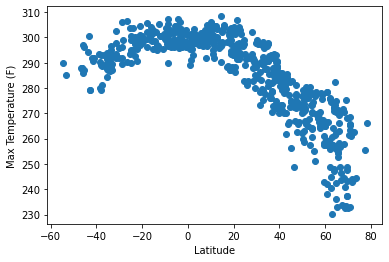

In [9]:
x_values = data_frame_city["lat"]
y_values = data_frame_city["max temp"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


Text(0, 0.5, 'Humidity (%)')

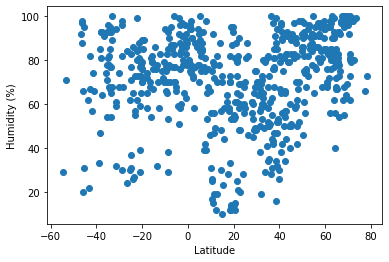

In [10]:
x_values = data_frame_city["lat"]
y_values = data_frame_city["humidity"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

Text(0, 0.5, 'Cloudiness (%)')

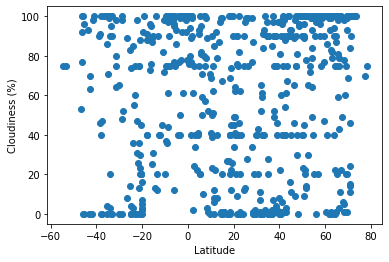

In [11]:
x_values = data_frame_city["lat"]
y_values = data_frame_city["cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

Text(0, 0.5, 'Wind Speed (mph)')

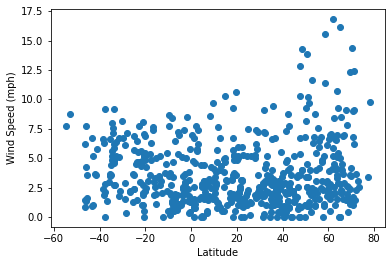

In [12]:
x_values = data_frame_city["lat"]
y_values = data_frame_city["wind speed"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

In [69]:
data_frame_city.to_csv("data_frame_city.csv")


The r-value is: 0.7541634854979724


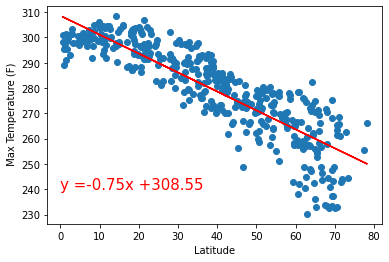

In [56]:
northern_data = data_frame_city.loc[data_frame_city["lat"] >= 0]
northern_data_max_temp = northern_data["max temp"]

 # Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_data["lat"],northern_data_max_temp)

# Get regression values
regress_values = northern_data["lat"] * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_data["lat"],northern_data_max_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Create Plot

plt.plot(northern_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(' Max Temperature (F)')
plt.annotate(line_eq,(0,240),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.4568380930887596


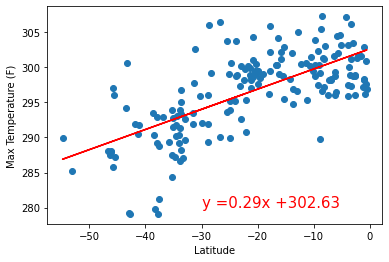

In [58]:
southern_data = data_frame_city.loc[data_frame_city["lat"] <= 0]
southern_data_max_temp = southern_data["max temp"]

 # Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_data["lat"],southern_data_max_temp)

# Get regression values
regress_values = southern_data["lat"] * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_data["lat"],southern_data_max_temp)

# Create Plot

plt.plot(southern_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-30,280),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.11646022551278683


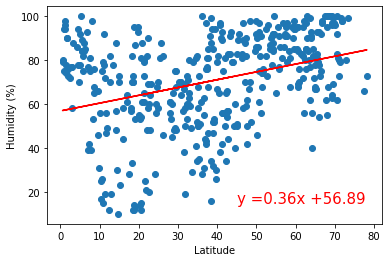

In [59]:
northern_data_humidity = northern_data["humidity"]

 # Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_data["lat"],northern_data_humidity)

# Get regression values
regress_values = northern_data["lat"] * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(northern_data["lat"],northern_data_humidity)

# Create Plot

plt.plot(northern_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.025404290047190862


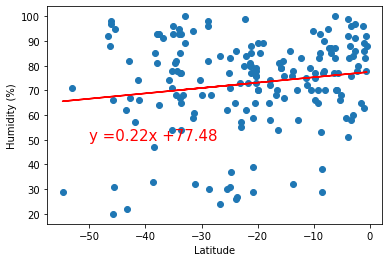

In [61]:
southern_data_humidity = southern_data["humidity"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_data["lat"],southern_data_humidity)

# Get regression values
regress_values = southern_data["lat"] * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_data["lat"],southern_data_humidity)

# Create Plot

plt.plot(southern_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.03188428639542761


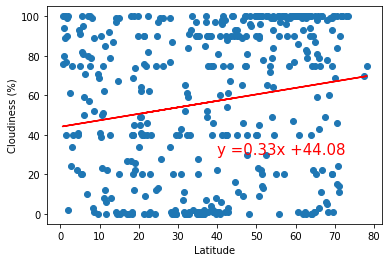

In [63]:
northern_data_cloudiness = northern_data["cloudiness"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_data["lat"],northern_data_cloudiness)

# Get regression values
regress_values = northern_data["lat"] * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_data["lat"],northern_data_cloudiness)

# Create Plot

plt.plot(northern_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04101092041270655


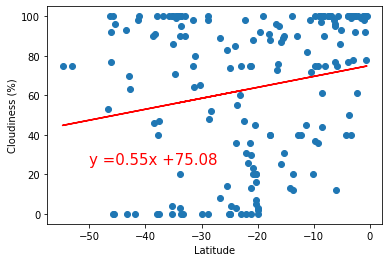

In [65]:
southern_data_cloudiness = southern_data["cloudiness"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_data["lat"],southern_data_cloudiness)

# Get regression values
regress_values = southern_data["lat"] * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_data["lat"],southern_data_cloudiness)

# Create Plot

plt.plot(southern_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.033631914154523206


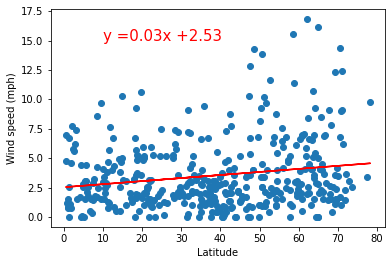

In [66]:
northern_data_wind_speed = northern_data["wind speed"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_data["lat"],northern_data_wind_speed)

# Get regression values
regress_values = northern_data["lat"] * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_data["lat"],northern_data_wind_speed)

# Create Plot

plt.plot(northern_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.058687183726072414


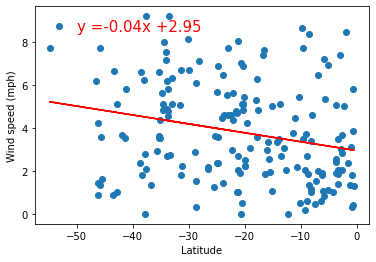

In [68]:
southern_data_wind_speed = southern_data["wind speed"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_data["lat"],southern_data_wind_speed)

# Get regression values
regress_values = southern_data["lat"] * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_data["lat"],southern_data_wind_speed)

# Create Plot

plt.plot(southern_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')
plt.annotate(line_eq,(-50,8.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()